<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/Lime_Method2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout



from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c5655690daa4a154bd9499b745d3a1733297657bd82b8f4b608638643a3a1f54
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

Mounted at /content/drive


In [ ]:
from re import X

image1=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/019.jpg")
image2=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/013.jpg")
image3=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/020.jpg")
img1=np.array(image1)
img2=np.array(image2)
img3=np.array(image3)

img_tensor1 = preprocessing.image.img_to_array(img1)
X1 = np.expand_dims(img_tensor1, axis=0)
img_tensor2 = preprocessing.image.img_to_array(img2)
X2 = np.expand_dims(img_tensor2, axis=0)
img_tensor3 = preprocessing.image.img_to_array(img3)
X3 = np.expand_dims(img_tensor3, axis=0)

image4=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/004.jpg")
image5=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/005.jpg")
image6=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/224.jpg")

img4=np.array(image4)
img5=np.array(image5)
img6=np.array(image6)
images=[img1,img2,img3,img4,img5,img6]
img1 = np.expand_dims(img1, axis=0)
img1 = np.expand_dims(img1, axis=-1)
img_tensor4 = preprocessing.image.img_to_array(img4)
X4 = np.expand_dims(img_tensor4, axis=0)
img_tensor5 = preprocessing.image.img_to_array(img5)
X5 = np.expand_dims(img_tensor5, axis=0)
img_tensor6 = preprocessing.image.img_to_array(img6)
X6 = np.expand_dims(img_tensor6, axis=0)
X1 = img1.reshape(img1.shape[0], 512,512,1).astype('float32') / 255
X2 = X2.reshape(X2.shape[0], 512,512,1).astype('float32') / 255
X3 = X3.reshape(X3.shape[0], 512,512,1).astype('float32') / 255
X4 = X4.reshape(X4.shape[0], 512,512,1).astype('float32') / 255
X5 = X5.reshape(X5.shape[0], 512,512,1).astype('float32') / 255
X6 = X6.reshape(X6.shape[0], 512,512,1).astype('float32') / 255

Xs=[X1,X2,X3,X4,X5,X6]




In [ ]:
image=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/019.jpg")
img=np.array(image)

In [ ]:
img2.shape

(512, 512)

In [ ]:

from skimage.segmentation import mark_boundaries


In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ModelSjogren3splits.h5",compile=False)


In [ ]:
from skimage.color import rgb2gray,gray2rgb
def new_predict_fn(images):
    images=rgb2gray(images)
    images = np.expand_dims(images, axis=-1)
    pred=model.predict(images)
    return pred

#Try 1

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer()


In [ ]:
pred=model.predict(X1)
print(pred)


1/1 [==============================] - 0s 225ms/step
[[1.]]


In [ ]:
import tensorflow as tf

# Supposons que `model` est votre modèle chargé et que `X2` sont vos données d'entrée.
# Vous devez vous assurer que `X2` est prétraité de la même manière que les données lors de l'entraînement du modèle.

# Obtenir les probabilités brutes du modèle
probabilities = model.predict(X2,batch_size=32, verbose=1)

# Afficher les probabilités
print(probabilities)

# Si vous voulez classer les prédictions en fonction d'un seuil
threshold = 0.5
class_predictions = (probabilities >= threshold).astype(int)

# Afficher les prédictions de classe après application du seuil
print(class_predictions)


1/1 [==============================] - 1s 766ms/step
[[1.]]
[[1]]


In [ ]:
from sklearn.linear_model import LinearRegression
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter2 = SegmentationAlgorithm('quickshift',  kernel_size=10, max_dist=6, ratio=0.5)


In [ ]:
explanation = explainer.explain_instance(gray2rgb(img3),new_predict_fn, top_labels=1, hide_color=0, num_samples=100,segmentation_fn=segmenter2)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


In [ ]:
explanation.top_labels

[0]

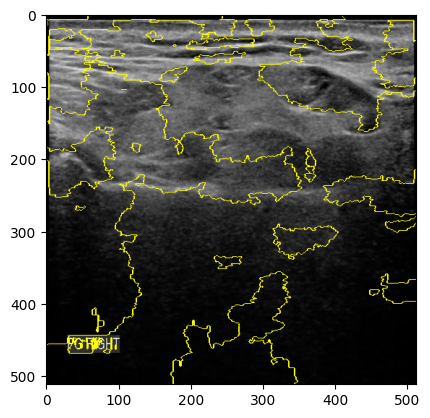

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=100, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

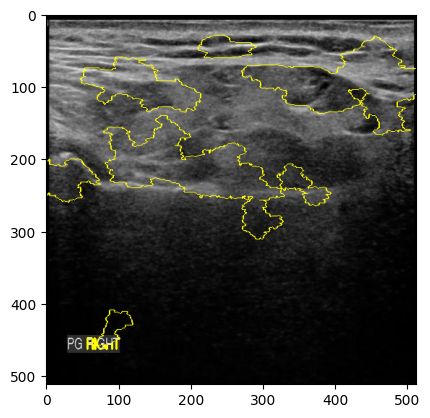

In [ ]:
 temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=False)
plt.imshow(mark_boundaries(temp1 , mask1))

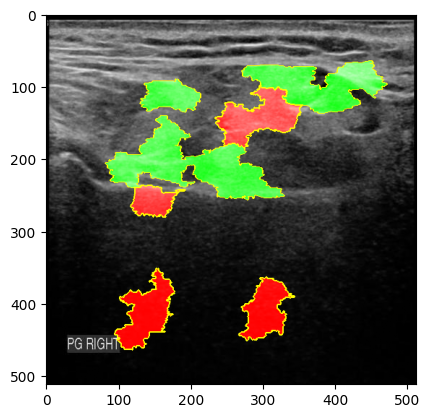

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=20 ,hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray, label2rgb

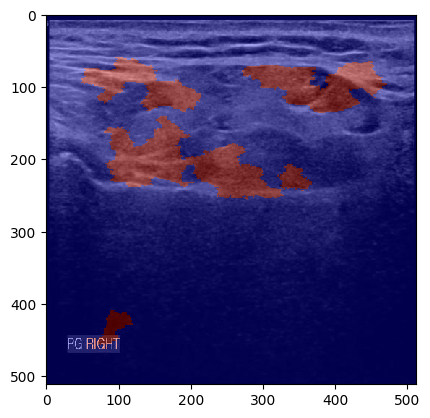

In [ ]:
temp, mask = explanation.get_image_and_mask(0, positive_only=True, num_features=20, hide_rest=False, min_weight = 0.01)
plt.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')

In [ ]:
# Utilisez la fonction get_image_and_mask pour générer un masque d'image
explanation = explainer.explain_instance(image, classifier_fn=predict_class, top_labels=[1])

# Obtenir un masque pour la classe "chat" (ou une autre classe de votre choix)
label = 1  # Vous pouvez remplacer cela par l'indice de classe de votre choix
mask, _ = explanation.get_image_and_mask(label, positive_only=True, hide_rest=False)

# Affichez le masque et l'image originale
plt.imshow(image)
plt.imshow(mask, alpha=0.6, cmap='coolwarm')
plt.show()

NameError: ignored

# 2eme try

In [ ]:
from lime import lime_image


from sklearn.linear_model import LinearRegression
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer1 = lime_image.LimeImageExplainer(verbose = False)
segmenter1 = SegmentationAlgorithm('quickshift', kernel_size=15,max_dist=200, ratio=0.05)

explanation1 = explainer1.explain_instance(gray2rgb(img),new_predict_fn,top_labels=10, hide_color=0, num_samples=10000,segmentation_fn=segmenter1)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


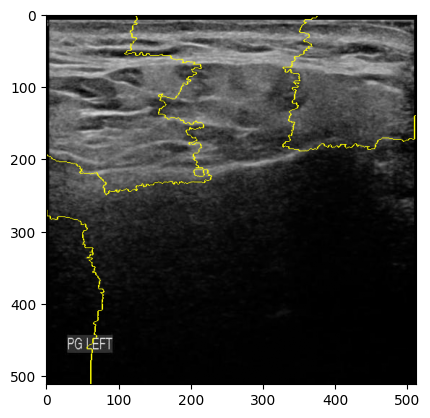

In [ ]:
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=100 ,hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Text(0.5, 1.0, 'Positive/Negative Regions for 1')

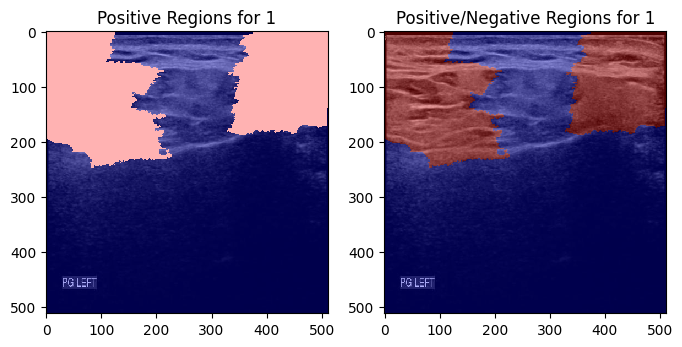

In [ ]:
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=False, num_features=100, hide_rest=False, min_weight = 0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(1))
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=100, hide_rest=False, min_weight = 0.01)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(1))

# AUTRE

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer3 = lime_image.LimeImageExplainer(feature_selection="lasso_path")


In [ ]:
segmenter3 = SegmentationAlgorithm('quickshift', kernel_size=10 ,max_dist=100, ratio=0.1)
explanation3 = explainer3.explain_instance(gray2rgb(img6),new_predict_fn,top_labels=10, hide_color=0, num_samples=10000,segmentation_fn=segmenter3)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


KeyboardInterrupt: ignored

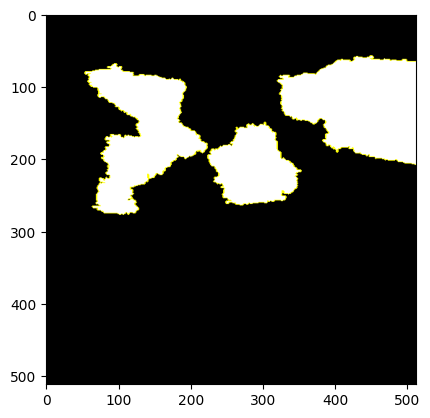

In [ ]:
temp3, mask3 = explanation3.get_image_and_mask(explanation3.top_labels[0], positive_only=True, num_features=5 ,hide_rest=True)
plt.imshow(mark_boundaries(temp3, mask3))

In [ ]:
a=gray2rgb(image1)
a.shape

(512, 512, 3)

## autres

Felzenszwalb number of segments: 19
Quickshift number of segments: 30


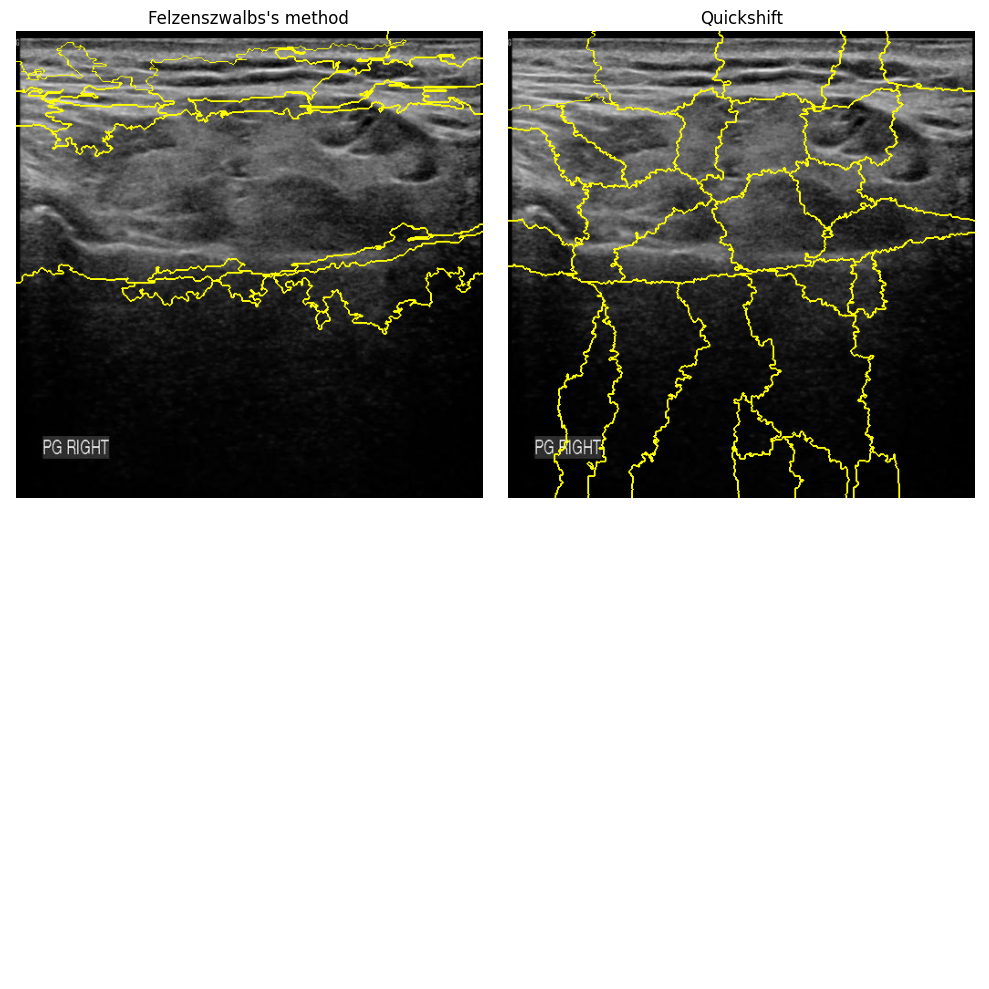

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float


segments_fz = felzenszwalb(image6, scale=150, sigma=0.7, min_size=1000)

segments_quick = quickshift(gray2rgb(img6), kernel_size=10, max_dist=30, ratio=0.1)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')


fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(gray2rgb(image3), segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(gray2rgb(image3), segments_quick))
ax[0, 1].set_title('Quickshift')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
explainer4 = lime_image.LimeImageExplainer()
segmenter4 = SegmentationAlgorithm('quickshift',kernel_size=15, max_dist=20, ratio=0.1)

In [ ]:
explanation4 = explainer4.explain_instance(gray2rgb(img3),new_predict_fn,top_labels=10, hide_color=0, num_samples=10000,segmentation_fn=segmenter4)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


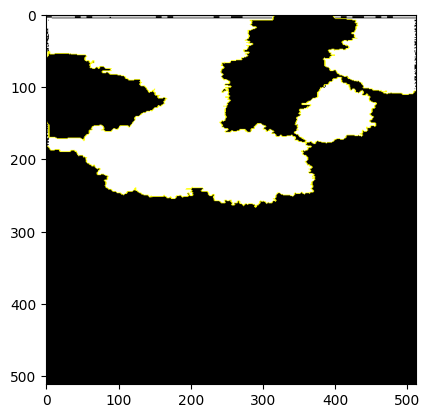

In [ ]:
temp4, mask4 = explanation4.get_image_and_mask(explanation4.top_labels[0], positive_only=True, num_features=8 ,hide_rest=True)
plt.imshow(mark_boundaries(temp4, mask4))

## Image_nsj

In [ ]:
explainer5 = lime_image.LimeImageExplainer(verbose=True)
segmenter5 = SegmentationAlgorithm('quickshift' ,kernel_size=15, max_dist=20, ratio=0.1)
explanation5 = explainer5.explain_instance(gray2rgb(img6),new_predict_fn,top_labels=2, hide_color=0, num_samples=10000,segmentation_fn=segmenter5)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step
Intercept 1.0294295874618553
Prediction_local [0.41951265]
Right: 0.0


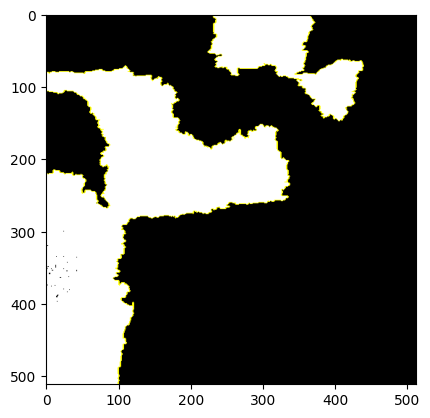

In [ ]:
temp5, mask5 = explanation5.get_image_and_mask(explanation5.top_labels[0], positive_only=True, num_features=5 ,hide_rest=True)
plt.imshow(mark_boundaries(temp5, mask5))

## image Sj

In [ ]:
explainer6 = lime_image.LimeImageExplainer(verbose=True)
segmenter6 = SegmentationAlgorithm('felzenszwalb', scale=100, sigma=0.9, min_size=1000)
explanation6 = explainer6.explain_instance(gray2rgb(img3),new_predict_fn,top_labels=2, hide_color=0, num_samples=10000,segmentation_fn=segmenter6)

In [ ]:
temp6, mask6 = explanation6.get_image_and_mask(explanation6.top_labels[0], positive_only=True, num_features=10 ,hide_rest=True)
plt.imshow(mark_boundaries(temp6, mask6))

final try

In [ ]:
Anexplanation = explainer.explain_instance(gray2rgb(img3),new_predict_fn, top_labels=1, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


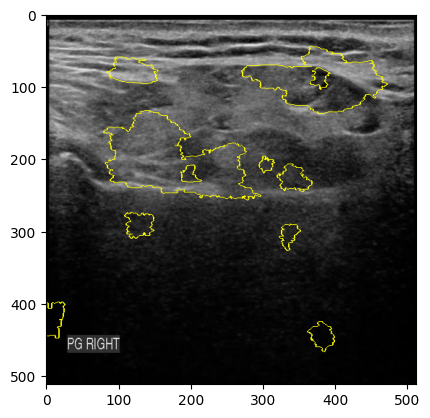

In [ ]:
temp, mask = Anexplanation.get_image_and_mask(Anexplanation.top_labels[0], positive_only=True, num_features=25 ,hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Exception ignored in: <function _xla_gc_callback at 0x78dfdccd8e50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


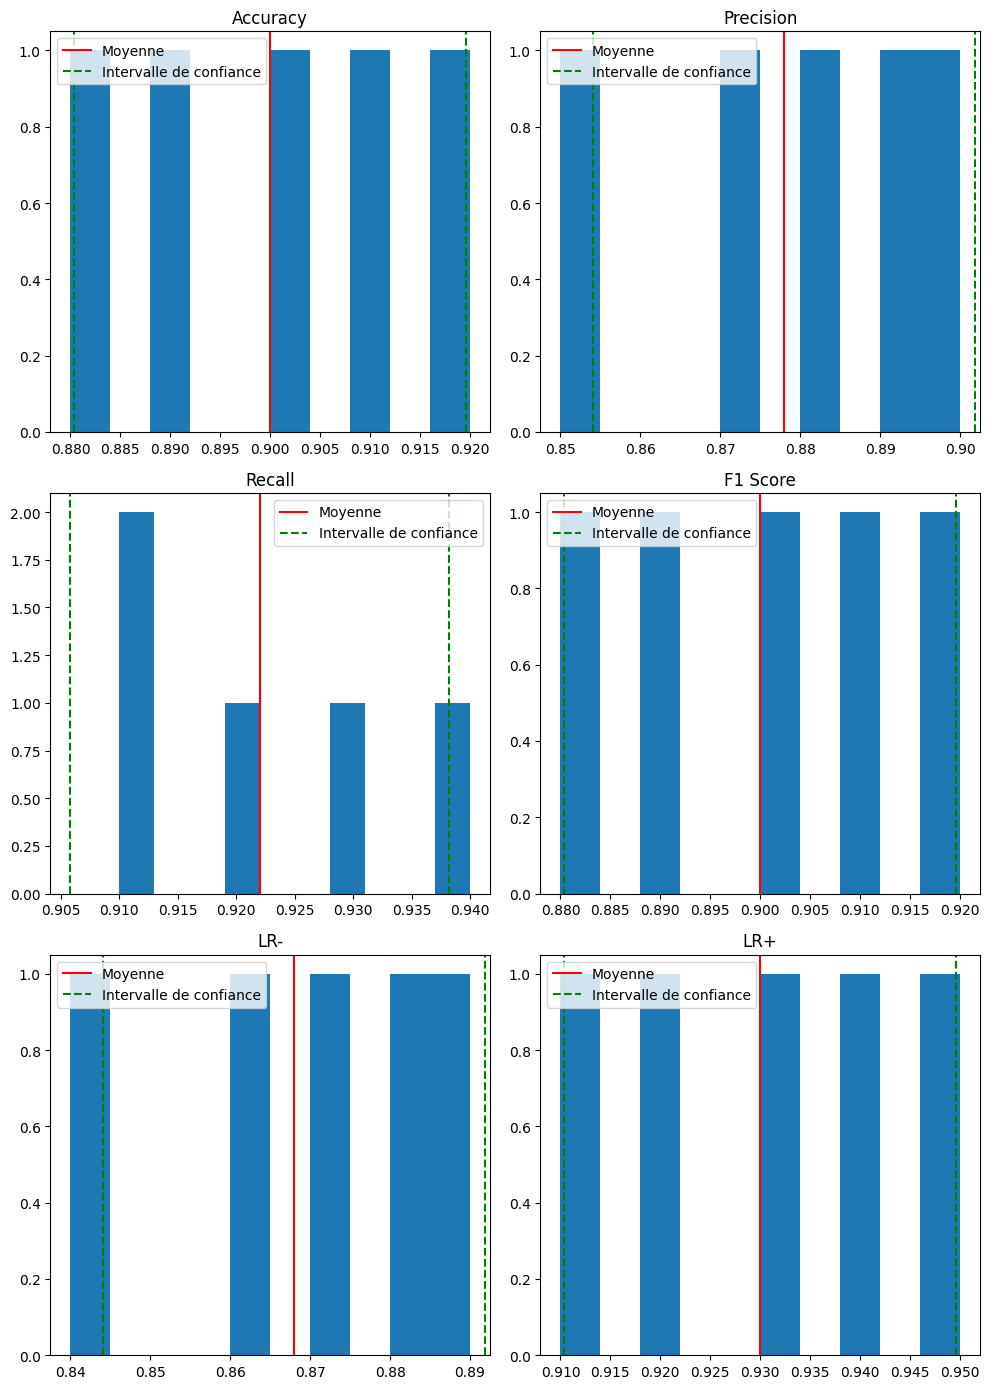

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Vos données de métriques (à remplacer par les vôtres)
accuracy_scores = [0.90, 0.92, 0.88, 0.91, 0.89]
precision_scores = [0.88, 0.90, 0.85, 0.89, 0.87]
recall_scores = [0.92, 0.94, 0.91, 0.93, 0.91]
f1_scores = [0.90, 0.92, 0.88, 0.91, 0.89]
lrs_moins = [0.87, 0.89, 0.84, 0.88, 0.86]
lrs_plus = [0.93, 0.95, 0.91, 0.94, 0.92]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'LR-', 'LR+']
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores, lrs_moins, lrs_plus]

# Création de la figure et des axes
fig, axs = plt.subplots(3, 2, figsize=(10, 14))
axs = axs.ravel()

for i in range(len(metrics)):
    # Calcul de l'intervalle de confiance à 95% pour chaque métrique
    conf_interval = stats.t.interval(0.95, len(scores[i]) - 1, loc=np.mean(scores[i]), scale=stats.sem(scores[i]))

    # Tracé de l'histogramme avec l'intervalle de confiance
    axs[i].hist(scores[i], bins=10)

    # Réglage de l'axe des abscisses
    axs[i].axvline(np.mean(scores[i]), color='red', label='Moyenne')
    axs[i].axvline(conf_interval[0], color='green', linestyle='--', label='Intervalle de confiance')
    axs[i].axvline(conf_interval[1], color='green', linestyle='--')
    axs[i].set_title(metrics[i])
    axs[i].legend()

# Affichage du graphique

plt.show()


Felzenszwalb number of segments: 194
SLIC number of segments: 196
Quickshift number of segments: 608
Watershed number of segments: 256


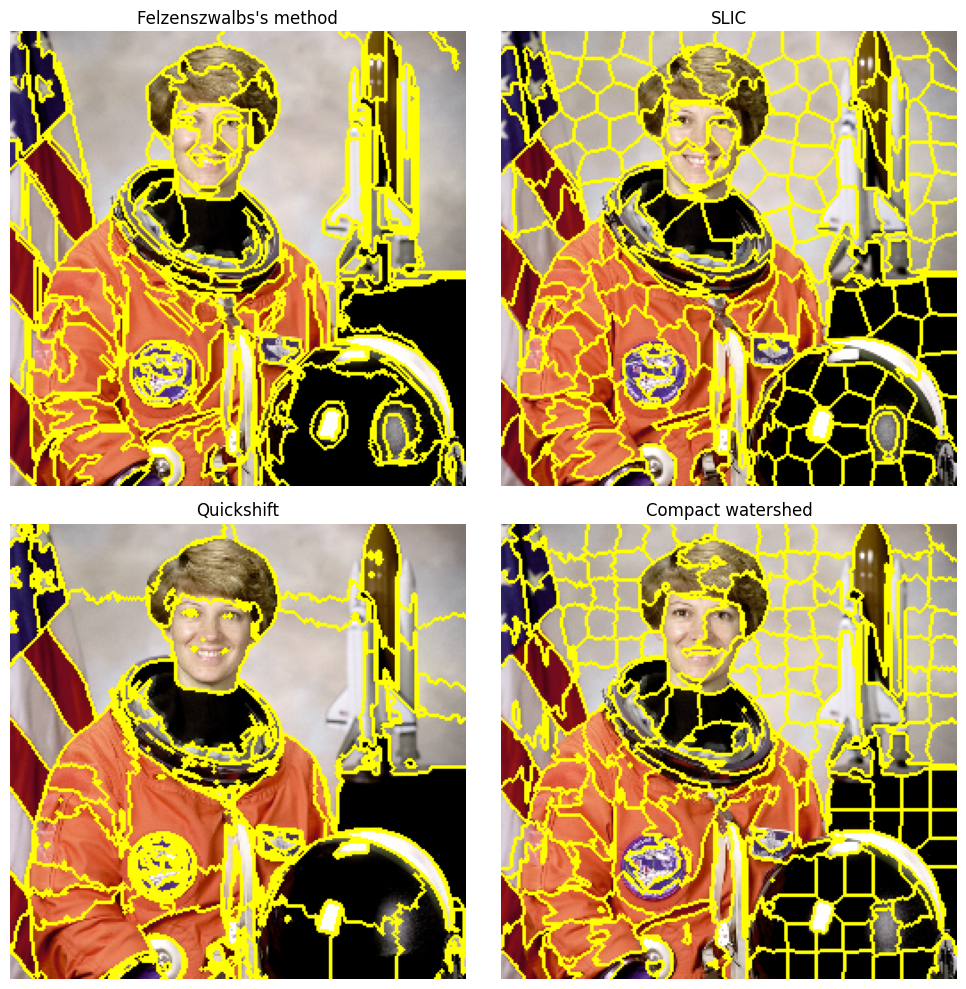

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=10, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()